## analisis pengaruh status perkawinan dalam jangka waktu peminjaman (/y)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("loan_customer.csv")

In [113]:
df.duplicated().sum()
df = df.drop_duplicates()

#### seleksi fitur

In [114]:
data = ['married', 'loan_term_year', 'loan_id']
data = df[data]
data

,married,loan_term_year,loan_id
0,No,30,LP001002
1,Yes,30,LP001003
2,Yes,30,LP001005
3,Yes,30,LP001006
4,No,30,LP001008
...,...,...,...
616,No,30,LP002978
617,Yes,15,LP002979
618,Yes,30,LP002983
619,Yes,30,LP002984


## preprocessing data

In [115]:
#cari missing value dan data duplikat
missing_values = data.isnull().sum()
print(missing_values)

married           3
loan_term_year    0
loan_id           0
dtype: int64


In [116]:
data=data.dropna(subset=['married'])

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 620
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   married         617 non-null    object
 1   loan_term_year  617 non-null    int64 
 2   loan_id         617 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.3+ KB


#### data grouping

In [118]:
data_group = data.groupby(['married','loan_term_year'])['loan_id'].count().reset_index()
data_group

,married,loan_term_year,loan_id
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,8
4,No,20,1
5,No,25,3
6,No,30,190
7,No,40,9
8,Yes,1,1
9,Yes,5,1


In [119]:
#kategorikan berdasar tahun

loan_term_year_group ={}
for i in range (1, 41):
    if i<15:
        loan_term_year_group[i]= '<15'
    if i>=15 and i<=25:
        loan_term_year_group[i]= '15-25'
    if i==30:
        loan_term_year_group[i]= '30'
    if i>30:
        loan_term_year_group[i]= '>30'
    else:
        pass
    
data_group['loan_term_year_group'] = data_group['loan_term_year'].replace(loan_term_year_group)

In [120]:
data_group.describe()

,loan_term_year,loan_id
count,17.000000,17.000000
mean,17.705882,36.294118
std,12.448718,90.690245
min,1.000000,1.000000
25%,7.000000,1.000000
50%,15.000000,3.000000
75%,25.000000,9.000000
max,40.000000,341.000000


### visualisasi

<function matplotlib.pyplot.show(close=None, block=None)>

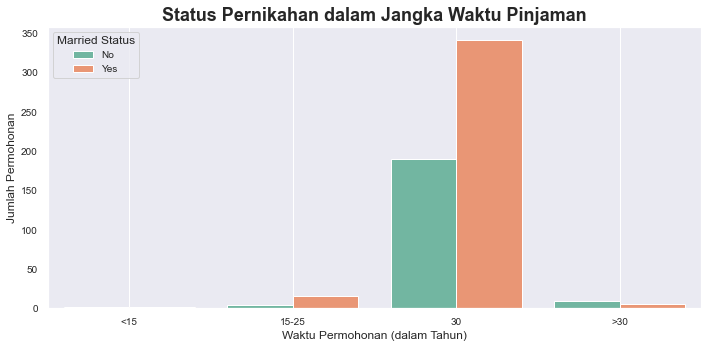

In [121]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_term_year_group', y='loan_id', hue='married', data=data_group, ci=None, palette = "Set2")

plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid()
plt.legend(title = 'Married Status', title_fontsize=12, prop={'size':10}, loc='upper left')

plt.xlabel ('Waktu Permohonan (dalam Tahun)', fontsize=12)
plt.ylabel ('Jumlah Permohonan', fontsize=12)
plt.title ("Status Pernikahan dalam Jangka Waktu Pinjaman", fontsize=18, fontweight = 'bold')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

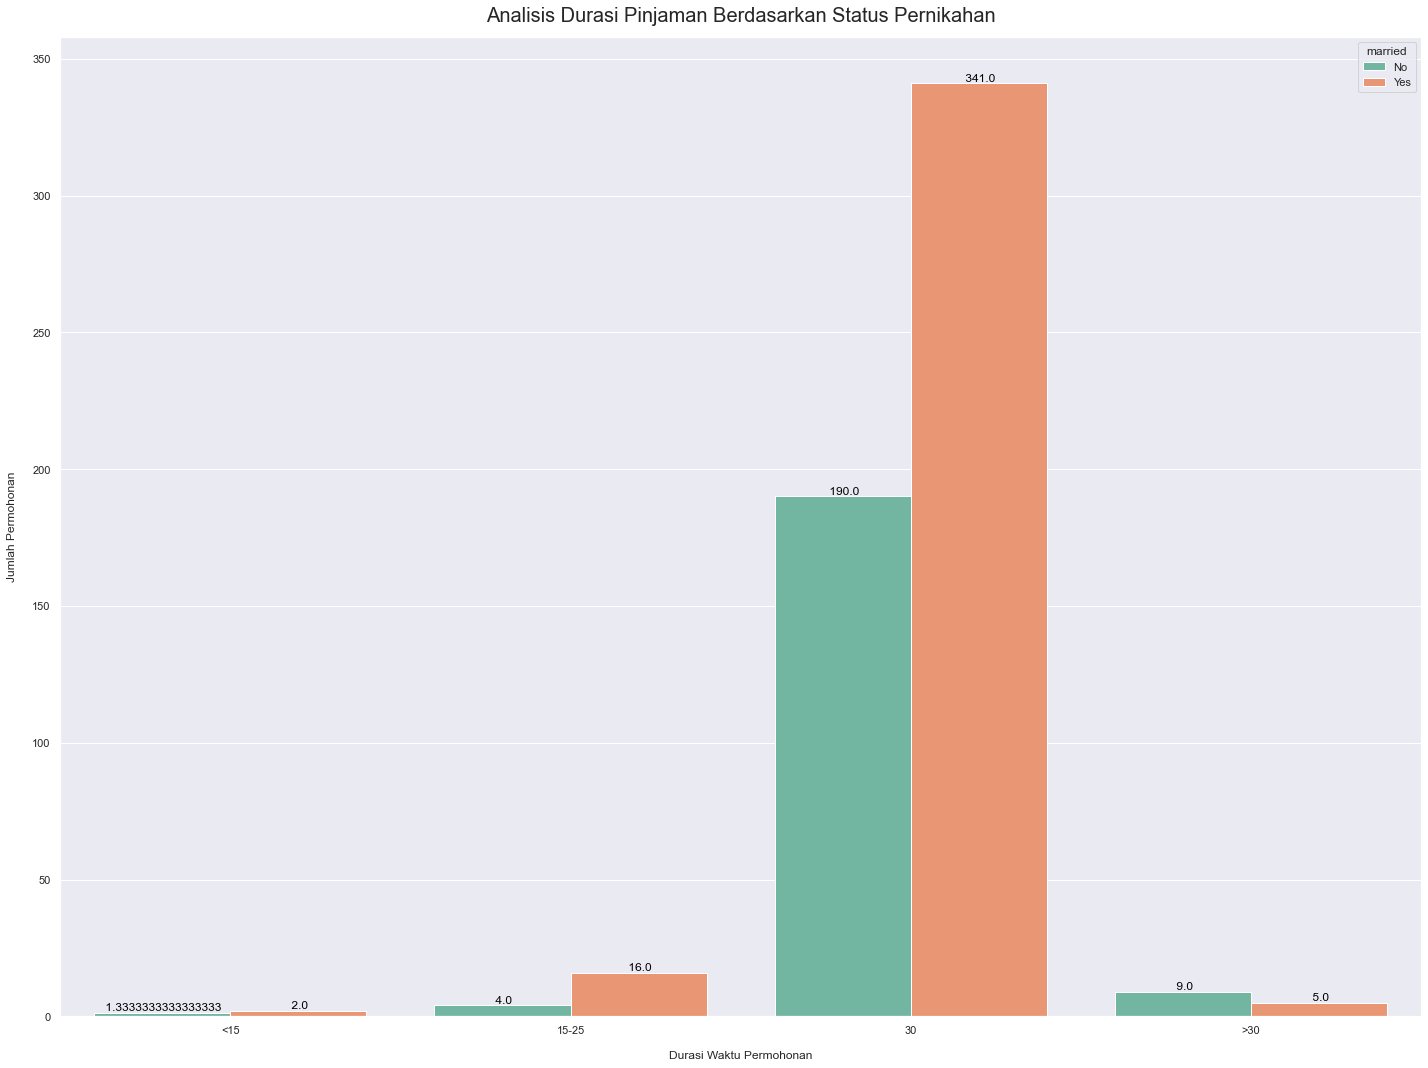

In [122]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1, figsize = (20,15))
sns.barplot(x='loan_term_year_group', y='loan_id', data=data_group, hue='married', ci=None, palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value: ,}'
    text_x = bar.get_x() + bar.get_width()/2
    text_y = bar.get_y()+bar_value
    bar_color= bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color = 'black', size=12)
    
ax.set_xlabel('Durasi Waktu Permohonan', labelpad=15)
ax.set_ylabel ('Jumlah Permohonan', labelpad =15)
ax.set_title('Analisis Durasi Pinjaman Berdasarkan Status Pernikahan', pad=15, size=20)
plt.tight_layout()
plt.show

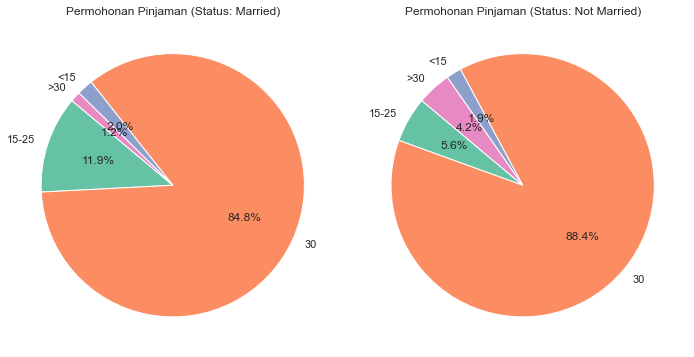

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membagi DataFrame menjadi dua berdasarkan status pernikahan
married_data = data_group[data_group['married'] == 'Yes']
not_married_data = data_group[data_group['married'] == 'No']

# Menghitung jumlah permohonan pinjaman berdasarkan grup durasi pinjaman untuk masing-masing status pernikahan
married_counts = married_data.groupby('loan_term_year_group')['loan_id'].sum()
not_married_counts = not_married_data.groupby('loan_term_year_group')['loan_id'].sum()

# Membuat diagram pie untuk status pernikahan "Married" (Ya)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Permohonan Pinjaman (Status: Married)')

# Membuat diagram pie untuk status pernikahan "Not Married" (Tidak)
plt.subplot(1, 2, 2)
plt.pie(not_married_counts, labels=not_married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Permohonan Pinjaman (Status: Not Married)')

plt.tight_layout()
plt.show()
